# 1 Author

Student name: Jayesh Kumar Soni

Student ID: 220239129


---



# 2 Problem Formulation


---




Using MLEnd London Soundtrack dataset to build m Machile Learning Pipeline that predicts whether it has been recorded southbank by taking input an audio file. 

We will note here that how many predictions can we taken to filter number of recordings done at southbank. 

 

# 3 Machine Learning Pipeline



---




We are having MLEnd London Sounds dataset, which consists of 2500 audio files, from which we drawout features such as MFCC,spectral centroid, pitch, Spectral rolloff and use the Librosa library to extract meaningful features. After splitting the dataset into two parts, a training dataset and a validation dataset, and fitting a suitable model (SVM, random forest and logistic regression in this case), we finally get the accuracy. This is shown in the image below.

In [1]:
# Importing libraries and mounting our Google Drive to Colab 

from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        with open(save_path, 'wb') as out_file:
            out_file.write(dl_file.read())

In [3]:
url  = "https://collect.qmul.ac.uk/down?t=610I73D2G2RLS4BI/R8RDLM2R3O9FHEMR92GKGR0"
save_path = '/content/drive/MyDrive/Data/MLEndLS/MLadvance.zip'
download_url(url, save_path)

In [4]:
path = '/content/drive/MyDrive/Data/MLEndLS'
os.listdir(path)

['MLEndLS_Sam.zip', 'sample', 'MLadvance.zip']

# Unzipping the sample data

In [5]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndLS/sample/'
zip_path = '/content/drive/MyDrive/Data/MLEndLS/MLEndLS_Sam.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [6]:
# Checking the number of files present in our dataset ->

sample_path = '/content/drive/MyDrive/Data/MLEndLS/sample/MLEndLS/*.wav'
files = glob.glob(sample_path)

In [8]:
# Reading the MLEndLS.csv file below which shows us the 5 attributes associated to each audio file, which are
# file_id, area, spot, in_out and Participant ->

MLENDLS_df = pd.read_csv('./MLEndLS.csv').set_index('file_id') 
MLENDLS_df

,area,spot,in_out,Participant
file_id,,,,
0001.wav,british,street,outdoor,S151
0002.wav,kensington,dinosaur,indoor,S127
0003.wav,campus,square,outdoor,S18
0004.wav,kensington,hintze,indoor,S179
0005.wav,campus,square,outdoor,S176
...,...,...,...,...
2496.wav,westend,trafalgar,outdoor,S151
2497.wav,campus,square,outdoor,S6
2498.wav,westend,national,indoor,S96


In [9]:
# We will now print the file names in our dataset, in order to cross-check if they match with the CSV 

for file in files:
  print(file.split('/')[-1])

2039.wav
2040.wav
2042.wav
2041.wav
2038.wav
2043.wav
2044.wav
2046.wav
2047.wav
2048.wav
2045.wav
2049.wav
2050.wav
2054.wav
2051.wav
2053.wav
2052.wav
2055.wav
2058.wav
2056.wav
2057.wav
2063.wav
2062.wav
2060.wav
2061.wav
2059.wav
2064.wav
2065.wav
2069.wav
2068.wav
2066.wav
2067.wav
2070.wav
2071.wav
2074.wav
2073.wav
2072.wav
2075.wav
2076.wav
2078.wav
2077.wav
2079.wav
2080.wav
2082.wav
2084.wav
2081.wav
2083.wav
2085.wav
2086.wav
2087.wav
2088.wav
2089.wav
2092.wav
2094.wav
2093.wav
2090.wav
2095.wav
2091.wav
2096.wav
2097.wav
2098.wav
2099.wav
2100.wav
2102.wav
2103.wav
2101.wav
2104.wav
2105.wav
2107.wav
2106.wav
2109.wav
2108.wav
2112.wav
2111.wav
2113.wav
2110.wav
2115.wav
2116.wav
2114.wav
2117.wav
2118.wav
2119.wav
2122.wav
2125.wav
2120.wav
2121.wav
2124.wav
2123.wav
2126.wav
2127.wav
2128.wav
2129.wav
2130.wav
2131.wav
2133.wav
2134.wav
2138.wav
2137.wav
2136.wav
2132.wav
2135.wav
2139.wav
2140.wav
2141.wav
2142.wav
2145.wav
2147.wav
2143.wav
2146.wav
2144.wav
2148.wav
2

In [10]:
# we filter out the recordings according to the area being "southbank"

newDataFrame = MLENDLS_df['area'] == 'southbank'
newDataFrame.value_counts()

False    2271
True      229
Name: area, dtype: int64

As Shown above, there are 229 files that have area as 'southbank'

# 4 Transformation stage


---



# Data Preprocessing

In [11]:
# We have used the sklearn preprocessing library here ->


from sklearn.preprocessing import LabelBinarizer
df = newDataFrame.copy()
result_df = pd.get_dummies(df,
                     columns = ['area','in_out','spot'])
  
display(result_df)

,False,True
file_id,,
0001.wav,1,0
0002.wav,1,0
0003.wav,1,0
0004.wav,1,0
0005.wav,1,0
...,...,...
2496.wav,1,0
2497.wav,1,0
2498.wav,1,0


As we can see above, we get a binary encoded version of our dataframe. This means that when 1 is placed under 'False' for a particular file, it has not been recorded in our 'southbank'. For example, consider file '2500.wav', we see that a 1 is placed under 'False' and so we conclude that it has not been recorded in 'southbank'.

In [12]:
# Let us see the relevant metrics about the dataset ->

result_df.describe()

,False,True
count,2500.000000,2500.000000
mean,0.908400,0.091600
std,0.288518,0.288518
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


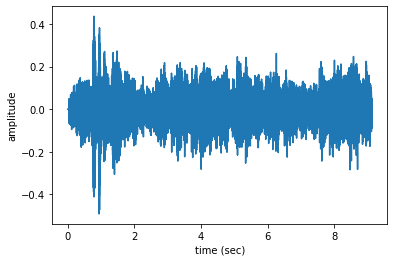

In [13]:
# Plottin one of the audio signals

n=0
fs = None # Sampling frequency
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

In [14]:
MLENDLS_df.loc[files[n].split('/')[-1]]

area           campus
spot            curve
in_out         indoor
Participant       S54
Name: 2039.wav, dtype: object

**FEATURE EXTRACTION: PITCH**

In [15]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

**FEATURE EXTRACTION: SPECTRAL CENTROID**

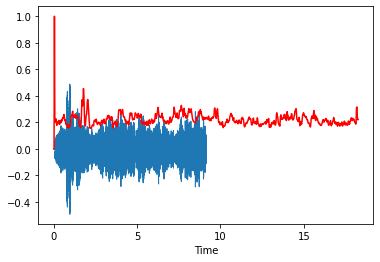

In [33]:
#Spectral Centroid -- centre of mass -- weighted mean of the frequencies present in the sound ->

import sklearn
import librosa.display
spectral_centroids = librosa.feature.spectral_centroid(x, sr= fs)[0]
spectral_centroids.shape

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, fs)
plt.plot(t, normalize(spectral_centroids), color='r')
    

**FEATURE EXTRACTION: SPECTRAL ROLLOFF**

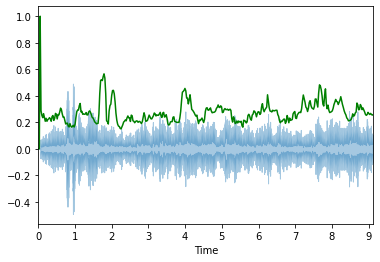

In [34]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=fs)[0]
librosa.display.waveplot(x, sr=fs, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='g')

**FEATURE EXTRACTION: MFCC**





(20, 787)


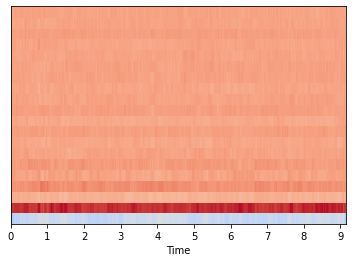

In [35]:
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

# 5 Modelling


---



In this scenario, we have used three different models and compared the accuracy results of both. The best model for this problem, according to me is 'Logistic Regression'. It gives us a Training Accuracy of 0.91 and a Testing Accuracy of 0.89, which is shown in one of the cells below.

*   It is the best model to use in this case since we can see that the difference between training accuracy and validation accuracy is the *least*.

*   One of the advantages of using logistic regression is that when the dataset is linearly separable it performs well.

*   Another advantage is that it is easy to implement and train.
*   In comparsion, Random Forest gives us a training accuracy of 1 and a validation accuracy of 0.89 (shown in one of the cells below).

So, it is clearly evident that Logistic Regression is more apt for our use case.

# 6 Methodology


---



In this case, we will use the 'accuracy' metric to assess the performance of our model. The code cell below shows us how complex an audio signal can be, by giving us the number of samples present in it.

In [19]:
n=0
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 402633 samples


# 7 Dataset


---



We have uploaded the data in a Drive folder, and then mounted it to colab (to give Colab access to it). The next cell defines a function that takes a collection of audio files together with a CSV file and creates a NumPy array containing the 4 audio features used as predictors (X) and a binary label (y) that indicates whether the recording is taken in southbank (y=1) or not in southbank (y=0).

we have used a 'try:' block in our code inside the getXy function. A try block is used for handling exceptions in programming. It ensures that our program is not terminated abruptly due to an exception.

In [20]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]

    try:
    
      yi = labels_file.loc[fileID]['area']=='southbank'

      fs = None # if None, fs would be 22050
      x, fs = librosa.load(file,sr=fs)
      if scale_audio: x = x/np.max(np.abs(x))
      f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
      power = np.sum(x**2)/len(x)
      pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
      pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
      voiced_fr = np.mean(voiced_flag)

      xi = [power,pitch_mean,pitch_std,voiced_fr]
      X.append(xi)
      y.append(yi)

    except:
      files.remove(file)
      labels_file.drop(file.split('/')[-1])

  return np.array(X),np.array(y)

In [21]:
# getting subset of original data set
X,y = getXy(files, labels_file=MLENDLS_df, scale_audio=True, onlySingleDigit=True)

  7%|▋         | 168/2500 [02:13<31:27,  1.24it/s]<ipython-input-20-8ed9c0f185f5>:13: RuntimeWarning: invalid value encountered in true_divide
  if scale_audio: x = x/np.max(np.abs(x))
100%|█████████▉| 2498/2500 [32:42<00:01,  1.27it/s]


In [22]:
# Printing the shape of x and y and the labels vector y ->

print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)

The shape of X is (2496, 4)
The shape of y is (2496,)
The labels vector is [False False False ...  True False False]


In [23]:
# Now we come to the final step for our problem, categorising the audio files (southbank/not in southbank) ->
print(' The number of recordings in southbank is ', np.count_nonzero(y))
print(' The number of recordings not in southbank is ', y.size - np.count_nonzero(y))

 The number of recordings in southbank is  229
 The number of recordings not in southbank is  2267


So, it is evident that out of the dataset of recordings that we have taken above, 229 recordings have been done in the southbank, while 2267 have not been taken in southbank.

# SVM

In [24]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1747, 4), (749, 4), (1747,), (749,))

In [25]:
# Using SVM, we get the following accuracy metrics 

from sklearn import preprocessing
import numpy as np
X_train1 = preprocessing.normalize(X_train)
X_val1 = preprocessing.normalize(X_val)

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train1,y_train)

yt_p = model.predict(X_train1)
yv_p = model.predict(X_val1)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.9118488838008014
Validation  Accuracy 0.8998664886515354
The support vectors are (327, 4)


# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_val)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [27]:
yt_p = random_forest.predict(X_train)
yv_p = random_forest.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 1.0
Validation  Accuracy 0.8918558077436582


In [28]:
random_forest.fit(X_train1, y_train)
yt_p = random_forest.predict(X_train1)
yv_p = random_forest.predict(X_val1)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.9862621637092158
Validation  Accuracy 0.8945260347129506


# LOGISTIC REGRESSION

In [29]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

91.18

In [30]:
yt_p = logreg.predict(X_train)
yv_p = logreg.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.9118488838008014
Validation  Accuracy 0.8998664886515354


In [31]:
logreg.fit(X_train1,y_train)
yt_p = logreg.predict(X_train1)
yv_p = logreg.predict(X_val1)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.9118488838008014
Validation  Accuracy 0.8998664886515354


# 8 Result


---



In [32]:
# Categorising the audio files (campus/not in campus) ->

print(' The number of recordings taken in southbank is: ', np.count_nonzero(y))
print(' The number of recordings not taken in southbank is: ', y.size - np.count_nonzero(y))

 The number of recordings taken in southbank is:  229
 The number of recordings not taken in southbank is:  2267


This is the solution to the final part of our project where in recordings taken in southbank are 229 and number of recordings not taken in southbank are 2267 out of the files considered of total 2498  recording files.

# 9 Conclusion


---



We have drawn the following conclusions:


*   The best of all the model used in this case according to me is Logistic Regression because it is neither underfitting nor overfitting.
*   We obtain a training accuracy of 0.91 using logistic regression.


*   We obtain a Testing accuracy of 0.89 using logistic regression.

The number of recordings from southbank is 229 and recordings not from southbank is 2267 out of the files.